In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('processed_response.zip')

FileNotFoundError: ignored

In [5]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/CS156_final/processed_response.zip')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LDA 
LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

Main idea 
- Every documents is a mixture of topics. e.g. Document 1 is 90% topic A and 10% topic B, while Document 2 is 30% topic A and 70% topic B.

- Every topic is a mixture of words. e.g. two-topic model of American news, with one topic for “politics” and one for “entertainment.” The most common words in the politics topic might be “President”, “Congress”, and “government”, while the entertainment topic may be made up of words such as “movies”, “television”, and “actor”.

Three main parts of LDA

1. Dimensionality Reduction: Rather than representing a text T in its feature space as `{Word_i: count(Word_i, T) for Word_i in Vocabulary}`, you can represent it in a topic space as `{Topic_i: Weight(Topic_i, T) for Topic_i in Topics}`.
2. Unsupervised Learning: By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight.
3. Tagging: abstract “topics” that occur in a collection of documents that best represents the information in them.

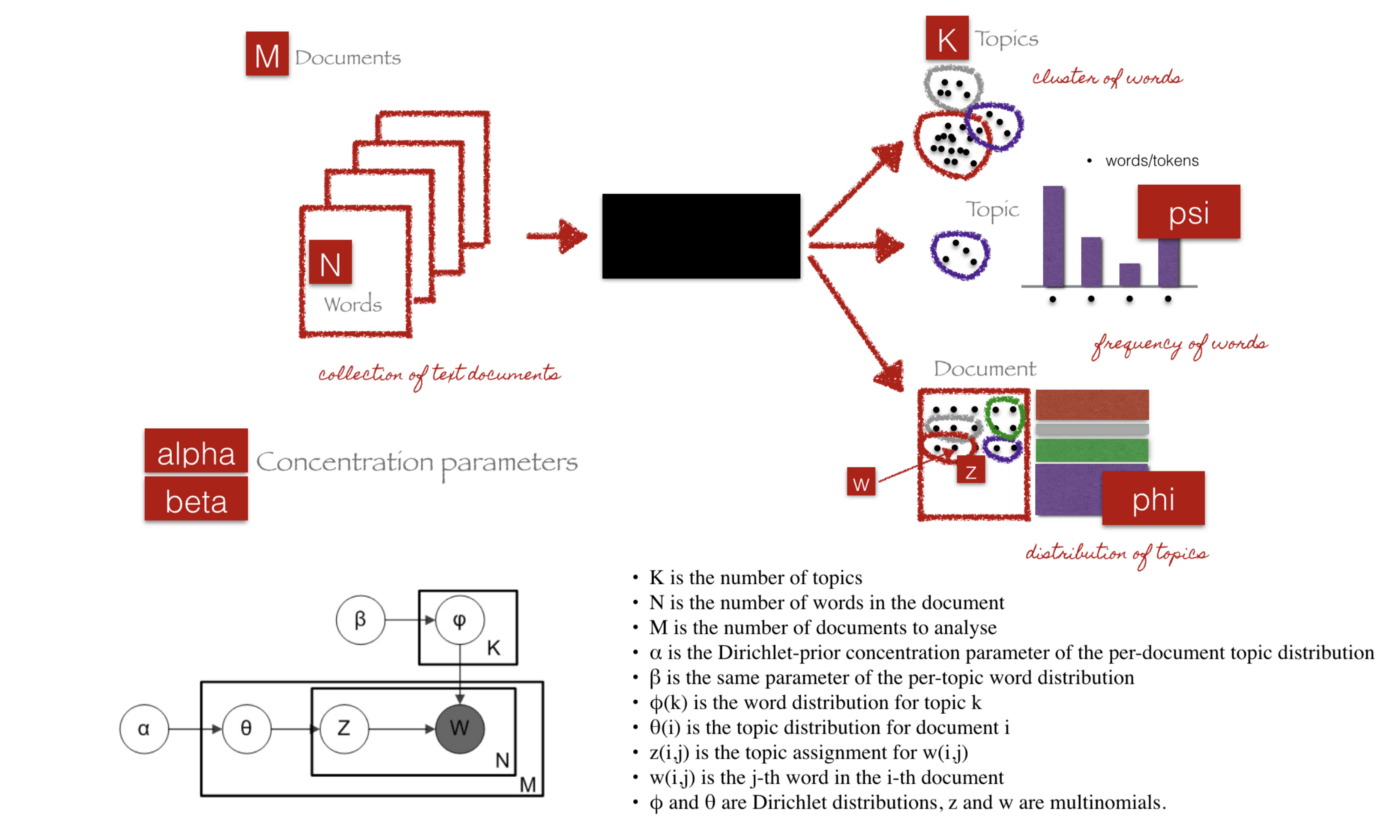

- psi, the distribution of words for each topic K
- phi, the distribution of topics for each document i
- $\alpha$: parameter is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.
- $\beta$: is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

- what is lambda? 
- how to intperpret the result of the topics? 


## Running LDA using bags of words

In [6]:
import gensim
import gensim.corpora as corpora

In [7]:
from ast import literal_eval

df['clean_responses'] = df['clean_responses'].apply(literal_eval)

In [8]:
# Create Dictionary
id2word = corpora.Dictionary(df['clean_responses'])
# Create Corpus
texts = df['clean_responses']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


In [9]:
#times a word appears 
corpus_0 = corpus[0]
for i in range(len(corpus_0)):
    print("Word {} (\"{}\") appears {} time.".format(corpus_0[i][0], id2word[corpus_0[i][0]], corpus_0[i][1]))

Word 0 ("abstract") appears 1 time.
Word 1 ("answer") appears 1 time.
Word 2 ("approach") appears 1 time.
Word 3 ("attack") appears 1 time.
Word 4 ("construct") appears 1 time.
Word 5 ("focus") appears 1 time.
Word 6 ("form") appears 1 time.
Word 7 ("framework") appears 2 time.
Word 8 ("good") appears 1 time.
Word 9 ("hard") appears 1 time.
Word 10 ("instead") appears 1 time.
Word 11 ("knowledg") appears 1 time.
Word 12 ("matt") appears 1 time.
Word 13 ("moral") appears 1 time.
Word 14 ("plato") appears 1 time.
Word 15 ("poll") appears 1 time.
Word 16 ("preparatori") appears 1 time.
Word 17 ("set") appears 1 time.
Word 18 ("specif") appears 1 time.
Word 19 ("strength") appears 1 time.
Word 20 ("veri") appears 1 time.
Word 21 ("weak") appears 1 time.
Word 22 ("whole") appears 1 time.
Word 23 ("would") appears 1 time.


In [10]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.010*"would" + 0.009*"compani" + 0.008*"market" + 0.007*"product" + '
  '0.006*"becaus" + 0.006*"increas" + 0.006*"countri" + 0.006*"peopl" + '
  '0.006*"strategi" + 0.006*"make"'),
 (1,
  '0.014*"use" + 0.011*"would" + 0.011*"data" + 0.010*"differ" + 0.010*"model" '
  '+ 0.009*"problem" + 0.009*"one" + 0.008*"variabl" + 0.008*"system" + '
  '0.006*"valu"'),
 (2,
  '0.010*"think" + 0.010*"peopl" + 0.009*"use" + 0.007*"one" + 0.007*"differ" '
  '+ 0.007*"make" + 0.007*"would" + 0.006*"way" + 0.006*"understand" + '
  '0.006*"becaus"'),
 (3,
  '0.015*"would" + 0.010*"n" + 0.009*"theori" + 0.008*"becaus" + 0.008*"one" + '
  '0.007*"time" + 0.006*"user" + 0.006*"right" + 0.005*"tree" + 0.005*"moral"'),
 (4,
  '0.036*"x" + 0.022*"b" + 0.019*"p" + 0.016*"c" + 0.013*"use" + 0.012*"v" + '
  '0.008*"evid" + 0.008*"f" + 0.007*"e" + 0.007*"argument"')]


In [11]:
#print the top 20 words in each topics 
topics_matrix = lda_model.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)
topic_words = topics_matrix[:,1]

for i in topic_words:
    print([str(word[0]) for word in i])
    print()

['would', 'compani', 'market', 'product', 'becaus', 'increas', 'countri', 'peopl', 'strategi', 'make', 'need', 'also', 'risk', 'chang', 'cost', 'could', 'high', 'one', 'effect', 'like']

['use', 'would', 'data', 'differ', 'model', 'problem', 'one', 'variabl', 'system', 'valu', 'becaus', 'result', 'solut', 'studi', 'could', 'algorithm', 'time', 'function', 'need', 'solv']

['think', 'peopl', 'use', 'one', 'differ', 'make', 'would', 'way', 'understand', 'becaus', 'like', 'also', 'exampl', 'audienc', 'person', 'context', 'group', 'could', 'cultur', 'bias']

['would', 'n', 'theori', 'becaus', 'one', 'time', 'user', 'right', 'tree', 'moral', 'number', 'process', 'case', 'move', 'need', 'first', 'list', 'use', 'sinc', 'googl']

['x', 'b', 'p', 'c', 'use', 'v', 'evid', 'f', 'e', 'argument', 'student', 'becaus', 'z', 'row', 'cell', 'r', 'thesi', 'present', 'would', 'gene']



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
!pip install pyLDAvis
import pyLDAvis
# import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import os
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.7 MB 11.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5ef3209fb38bb693ab9d85977abd084dff0688df71cca5b0a0875be5180c19ea
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [14]:
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [15]:
pyLDAvis.display(LDAvis_prepared)

The relevance metric: $\lambda$

- $\lambda$ = 1: ranking soley by probability is decending order 
- $\lambda$ = 0: ranking soley by the lift. lift = the ratio of a term’s probability within a topic to its marginal probability across the corpus. It generally decreases with globally frequent terms. But it can be noisy too if the rare terms only occur in one single topic.

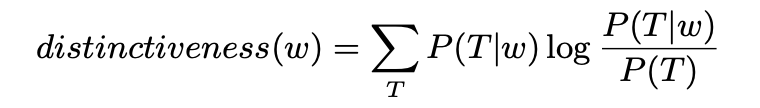

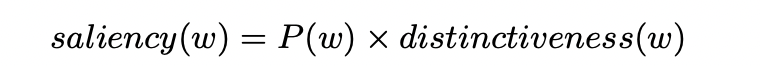

$P(T|w)$: the likelihood that observed word $w$ was generated by latent topic $T$. We use it to determine how informative a specific word $w$ can inform the topics. If word tells little of the topic mixture it will receive a low distinctiveness score. 


In [16]:
pyLDAvis.save_html(LDAvis_prepared, 'lda.html')

## Running LDA using tf-idf 

In [17]:
from gensim import corpora, models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Build LDA model on tf-idf
lda_model_tf = gensim.models.LdaMulticore(corpus=corpus_tfidf,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_tf.print_topics())

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

[(0,
  '0.007*"audienc" + 0.006*"music" + 0.005*"emot" + 0.004*"use" + '
  '0.004*"languag" + 0.004*"word" + 0.003*"narrat" + 0.003*"memori" + '
  '0.003*"context" + 0.003*"stori"'),
 (1,
  '0.004*"would" + 0.003*"compani" + 0.003*"system" + 0.003*"peopl" + '
  '0.003*"think" + 0.003*"market" + 0.003*"differ" + 0.003*"need" + '
  '0.003*"effect" + 0.003*"problem"'),
 (2,
  '0.012*"x" + 0.007*"poll" + 0.007*"p" + 0.007*"algorithm" + 0.006*"student" '
  '+ 0.006*"complet" + 0.006*"n" + 0.006*"b" + 0.005*"vector" + '
  '0.005*"present"'),
 (3,
  '0.005*"bias" + 0.005*"studi" + 0.003*"theori" + 0.003*"evid" + '
  '0.003*"peopl" + 0.003*"cultur" + 0.003*"hypothesi" + 0.003*"think" + '
  '0.003*"research" + 0.003*"argument"'),
 (4,
  '0.006*"cell" + 0.006*"energi" + 0.005*"gene" + 0.005*"speci" + '
  '0.004*"mutat" + 0.004*"temperatur" + 0.004*"entropi" + 0.004*"heat" + '
  '0.003*"clay" + 0.003*"water"')]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [18]:
#print the top 20 words in each topics 
topics_matrix = lda_model_tf.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)
topic_words = topics_matrix[:,1]

for i in topic_words:
    print([str(word[0]) for word in i])
    print()

['audienc', 'music', 'emot', 'use', 'languag', 'word', 'narrat', 'memori', 'context', 'stori', 'messag', 'attent', 'feel', 'write', 'express', 'read', 'art', 'way', 'think', 'visual']

['would', 'compani', 'system', 'peopl', 'think', 'market', 'differ', 'need', 'effect', 'problem', 'one', 'make', 'could', 'product', 'chang', 'use', 'level', 'also', 'becaus', 'countri']

['x', 'poll', 'p', 'algorithm', 'student', 'complet', 'n', 'b', 'vector', 'present', 'valu', 'matrix', 'probabl', 'distribut', 'sampl', 'function', 'equat', 'c', 'com', 'https']

['bias', 'studi', 'theori', 'evid', 'peopl', 'cultur', 'hypothesi', 'think', 'research', 'argument', 'would', 'one', 'differ', 'human', 'experi', 'becaus', 'question', 'person', 'use', 'way']

['cell', 'energi', 'gene', 'speci', 'mutat', 'temperatur', 'entropi', 'heat', 'clay', 'water', 'snake', 'phenotyp', 'increas', 'bacteria', 'genet', 'protein', 'earth', 'carbon', 'co', 'reaction']



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
LDAvis_prepared_tf = gensimvis.prepare(lda_model_tf, corpus_tfidf, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [20]:
pyLDAvis.display(LDAvis_prepared_tf)

In [21]:
pyLDAvis.save_html(LDAvis_prepared_tf, 'lda_tf.html')